In [44]:
import os
import numpy as np
import pandas as pd

from sklearn.preprocessing import MinMaxScaler, LabelBinarizer
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

import tensorflow as tf

from PIL import Image

import matplotlib.pyplot as plt

In [12]:
# List of emotions on the dataset we want to include (using comments -#- to exlcude).

EMOTIONS=[
    #'angry',
    #'disgust',
    #'fear',
    'happy',
    'neutral',
    'sad',
    'surprise',
]

In [13]:
# Load dataset images into the DataFrame.

dataset = []

for emotion in EMOTIONS:
    if os.path.isdir(f'dataset/{emotion}'):
        for image_filename in os.listdir(f'dataset/{emotion}'):
            image = Image.open(f'dataset/{emotion}/{image_filename}')
            pixels = np.array(image).astype(float)
            dataset.append((pixels, emotion))

df = pd.DataFrame(dataset, columns=['pixels', 'emotion'])

In [33]:
# Normalizacion of the data.

X = np.array([MinMaxScaler().fit_transform(e) for e in df['pixels']])
lb = LabelBinarizer()
Y = lb.fit_transform(df['emotion'])

In [18]:
# Load trained model.

MODEL='models/modelConv.h5'

model = tf.keras.models.load_model(MODEL)

790/790 [==============================] - 6s 7ms/step


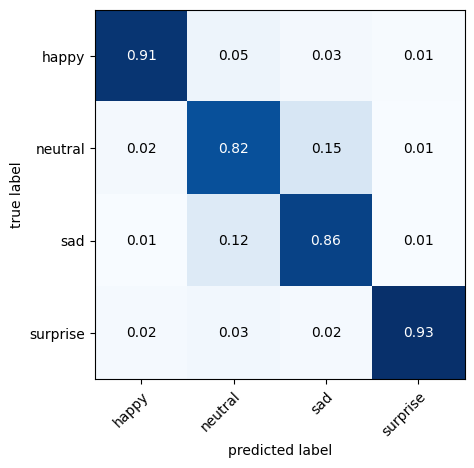

In [49]:
Y_pred = model.predict(X)

m = confusion_matrix(lb.inverse_transform(Y), lb.inverse_transform(Y_pred))

plot_confusion_matrix(m, class_names=EMOTIONS, show_absolute=False, show_normed=True)
plt.show()

In [34]:
lb.inverse_transform(Y)

array(['happy', 'happy', 'happy', ..., 'surprise', 'surprise', 'surprise'],
      dtype='<U8')

In [37]:
Y

array([[1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       ...,
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [0, 0, 0, 1]])

In [35]:
lb.inverse_transform(Y_pred)

array(['happy', 'happy', 'happy', ..., 'surprise', 'surprise', 'surprise'],
      dtype='<U8')